In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_pickle("df_results_3_0")
data2 = pd.read_pickle("df_results_4_0")

In [3]:
data = data1.append(data2)

/var/folders/4p/mr19cxrs6_z3dsfws0cjcwfw0000gn/T/ipykernel_78628/2571438737.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data1.append(data2)


In [4]:
data.reset_index(inplace=True)
data.drop("index", axis=1, inplace=True)

In [5]:
pd.set_option("display.max_rows", 10)

In [6]:
data

,Classifier,Precision,Recall,F1-score,Timestamp
0,Support Vector Machines,0.68,0.48,0.56,17052023_2151
1,Decision Tree,0.45,0.52,0.48,17052023_2151
2,Random Forest,0.70,0.65,0.68,17052023_2151
3,Neural Network,0.30,0.52,0.39,17052023_2151
4,Support Vector Machines,0.49,0.45,0.47,17052023_2159
...,...,...,...,...,...
395,Neural Network,0.45,0.42,0.44,20052023_1556
396,Support Vector Machines,0.61,0.50,0.55,20052023_1605
397,Decision Tree,0.34,0.45,0.39,20052023_1605
398,Random Forest,0.88,0.70,0.78,20052023_1605


In [7]:
data_rf = data[data["Classifier"] == "Random Forest"]
data_rf

,Classifier,Precision,Recall,F1-score,Timestamp
2,Random Forest,0.70,0.65,0.68,17052023_2151
6,Random Forest,0.76,0.55,0.64,17052023_2159
10,Random Forest,0.78,0.70,0.74,17052023_2209
14,Random Forest,0.90,0.68,0.77,17052023_2217
18,Random Forest,0.78,0.52,0.63,17052023_2226
...,...,...,...,...,...
382,Random Forest,0.55,0.45,0.49,20052023_1530
386,Random Forest,0.64,0.68,0.66,20052023_1539
390,Random Forest,0.79,0.55,0.65,20052023_1548
394,Random Forest,0.72,0.57,0.64,20052023_1556


In [8]:
data_rf["Recall"].std().round(2)

0.08

In [9]:
data_rf.groupby(by="Classifier").mean().round(2)

,Precision,Recall,F1-score
Classifier,,,
Random Forest,0.74,0.59,0.65


In [10]:
data_rf.groupby(by="Classifier").std().round(2)

,Precision,Recall,F1-score
Classifier,,,
Random Forest,0.09,0.08,0.07


In [11]:
data_rf.groupby(by="Classifier").var().round(2)

,Precision,Recall,F1-score
Classifier,,,
Random Forest,0.01,0.01,0.0


---

In [12]:
data.groupby(by="Classifier").mean().round(2)

,Precision,Recall,F1-score
Classifier,,,
Decision Tree,0.42,0.47,0.43
Neural Network,0.42,0.48,0.43
Random Forest,0.74,0.59,0.65
Support Vector Machines,0.58,0.45,0.49


In [13]:
data.describe()

,Precision,Recall,F1-score
count,400.000000,400.000000,400.000000
mean,0.538300,0.494325,0.500500
std,0.165924,0.110374,0.109443
min,0.210000,0.220000,0.270000
25%,0.400000,0.420000,0.420000
50%,0.510000,0.500000,0.480000
75%,0.680000,0.570000,0.570000
max,0.920000,0.780000,0.780000


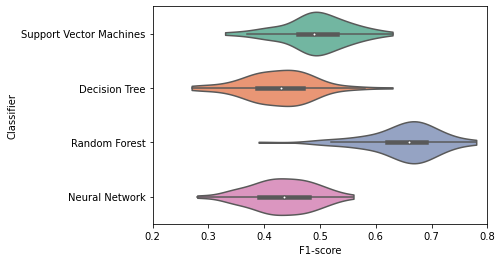

In [15]:
ax = sns.violinplot(data=data, y="Classifier", x="F1-score", orient="h", palette="Set2", showmeans=True, cut=0)
# sns.boxplot(data=data, y="Classifier", x="Recall", orient="h", color="white", showmeans=True, ax=ax)
ax.set_xlim(0.2, 0.8)
plt.savefig(f"results-f1.pdf", format="pdf", dpi=300, bbox_inches='tight')

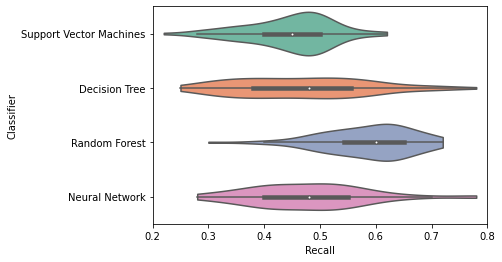

In [16]:
ax = sns.violinplot(data=data, y="Classifier", x="Recall", orient="h", palette="Set2", showmeans=True, cut=0)
ax.set_xlim(0.2, 0.8)
plt.savefig(f"results-recall.pdf", format="pdf", dpi=300, bbox_inches='tight')

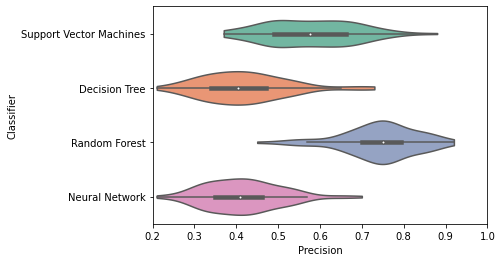

In [17]:
ax = sns.violinplot(data=data, y="Classifier", x="Precision", orient="h", palette="Set2", showmeans=True, cut=0)
ax.set_xlim(0.2, 1)
plt.savefig(f"results-precission.pdf", format="pdf", dpi=300, bbox_inches='tight')